In [851]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [852]:
# Read csv dataset
df = pd.read_csv('heart.csv')
df.dropna(inplace = True) 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [853]:
# Replace all text data with numbers ONE_HOT
def replace_column_with_one_hot(column, df):
    one_hot = pd.get_dummies(df[column])
    df = df.drop(column, axis=1)
    df = df.join(one_hot)
    return df

columns_to_replace = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for colname in columns_to_replace:
    df = replace_column_with_one_hot(colname, df)

df.shape

(918, 21)

In [854]:
train, test = train_test_split(df, test_size=0.2)
train.shape, test.shape

label = 'HeartDisease'

y_train = train.pop(label)
y_test = test.pop(label)

x_train = train
x_test = test

x_train.shape, y_train.shape

((734, 20), (734,))

In [855]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
685,61,120,260,0,140,3.6,0,1,1,0,0,0,0,1,0,0,1,0,1,0
71,44,130,215,0,135,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
797,41,110,172,0,158,0.0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
358,38,115,0,0,128,0.0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
86,65,170,263,1,112,2.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,57,180,285,1,120,0.8,0,1,0,1,0,0,0,0,1,1,0,0,1,0
562,59,140,274,0,154,2.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
234,54,140,309,0,140,0.0,1,0,0,1,0,0,0,0,1,1,0,0,0,1


In [856]:
norm = tf.keras.layers.Normalization(axis=-1)
norm.adapt(x_train)
norm(x_train.iloc[:3])

2021-12-26 13:13:01.144521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-26 13:13:01.158503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 0.7739462 , -0.72112197,  0.56141967, -0.5427086 ,  0.11262137,
         2.6316657 , -0.51740015,  0.51740026,  0.9062782 , -0.4639308 ,
        -0.5385002 , -0.22710341, -0.51104647,  0.8174238 , -0.48975992,
        -1.2233555 ,  1.2233555 , -0.27612743,  0.99456507, -0.86224586],
       [-1.0039078 , -0.17262033,  0.15599579, -0.5427086 , -0.08015909,
        -0.8335094 , -0.51740015,  0.51740026, -1.103414  ,  2.155494  ,
        -0.5385002 , -0.22710341, -0.51104647,  0.8174238 , -0.48975992,
         0.8174238 , -0.8174238 , -0.27612743, -1.0054646 ,  1.1597621 ],
       [-1.3176467 , -1.2696235 , -0.23140927, -0.5427086 ,  0.806631  ,
        -0.8335094 , -0.51740015,  0.51740026,  0.9062782 , -0.4639308 ,
        -0.5385002 , -0.22710341,  1.9567697 , -1.2233558 , -0.48975992,
         0.8174238 , -0.8174238 , -0.27612743, -1.0054646 ,  1.1597621 ]],
      dtype=float32)>

In [857]:
model = tf.keras.Sequential([
  norm,
  tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(train.shape[1],)),
  tf.keras.layers.Dense(8, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [858]:
learning_rate = 0.0001
epochs = 800

opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
metric = tf.keras.metrics.BinaryCrossentropy(from_logits=False)

model.compile(optimizer=opt, loss=loss, metrics=[metric, 'accuracy'])
model.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_68 (Normaliza  (None, 20)               41        
 tion)                                                           
                                                                 
 dense_195 (Dense)           (None, 16)                336       
                                                                 
 dense_196 (Dense)           (None, 8)                 136       
                                                                 
 dense_197 (Dense)           (None, 1)                 9         
                                                                 
Total params: 522
Trainable params: 481
Non-trainable params: 41
_________________________________________________________________


In [859]:
history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.2, verbose=0)

2021-12-26 13:13:01.515297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-26 13:13:02.313629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


dict_keys(['loss', 'binary_crossentropy', 'accuracy', 'val_loss', 'val_binary_crossentropy', 'val_accuracy'])


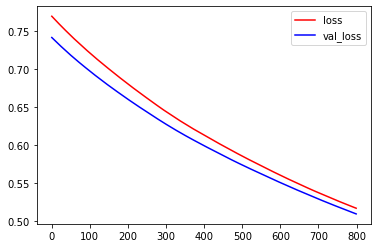

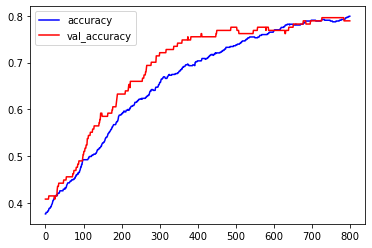

In [860]:
print(history.history.keys())

plt.plot(history.history['loss'], c='r')
plt.plot(history.history['val_loss'], c='b')
plt.legend(['loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'], c='b')
plt.plot(history.history['val_accuracy'], c='r')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [861]:
model.evaluate(x_test, y_test, verbose=2)

6/6 - 0s - loss: 0.5332 - binary_crossentropy: 0.5332 - accuracy: 0.8098 - 49ms/epoch - 8ms/step


[0.5332428812980652, 0.5332428812980652, 0.8097826242446899]

In [866]:
pred = model.predict(x_test)
list(map(lambda x: [1, x[1]] if x[0] > 0.5 else [0, x[1]], zip(pred, y_test)))

[[1, 1],
 [0, 0],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 1],
 [0, 1],
 [1, 1],
 [0, 1],
 [0, 1],
 [0, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [0, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [0, 0],
 [1, 0],
 [0, 1],
 [0, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [0, 0],
 [1, 0],
 [1, 1],
 [1, 0],
 [1, 0],
 [1, 1],
 [0, 0],
 [1, 1],
 [0, 0],
 [1, 0],
 [1, 1],
 [0, 1],
 [1, 1],
 [0, 0],
 [0, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 0],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 0],
 [0, 0],
 [1, 1],
 [1, 0],
 [0, 0],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 1],
 [1, 1],
 [0, 0],
 [1, 0],
 [0, 1],
 [1, 1],
 [0, 0],
 [0, 0],
 [1, 0],
 [1, 1],
 [0, 0],
 [0, 1],
 [1, 1],
 [1, 1],
 